In [1]:
#project 1

In [2]:
#pip install matplotlib seaborn # type: ignore
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # type: ignore
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
# Load the CSV file
data = pd.read_csv('iris.csv')
data.columns = data.columns.str.replace('"', '')  # Clean column names

# Display the first few rows of the dataset
print("Head of the dataset:")
print(data.head())

Head of the dataset:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


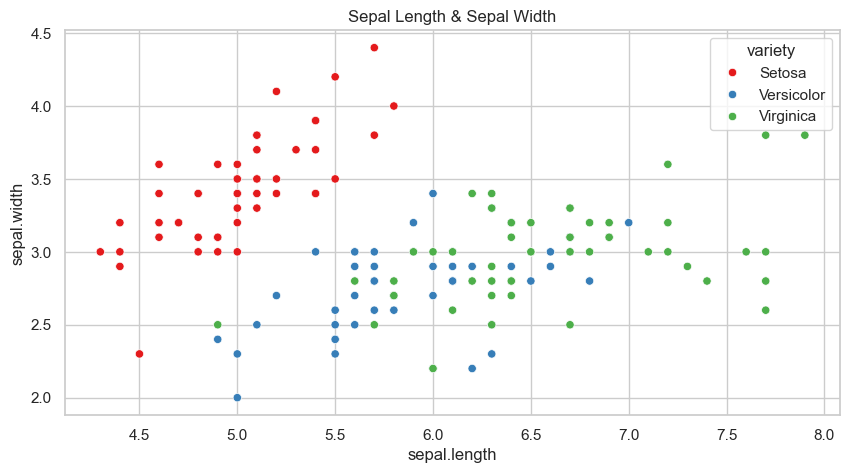

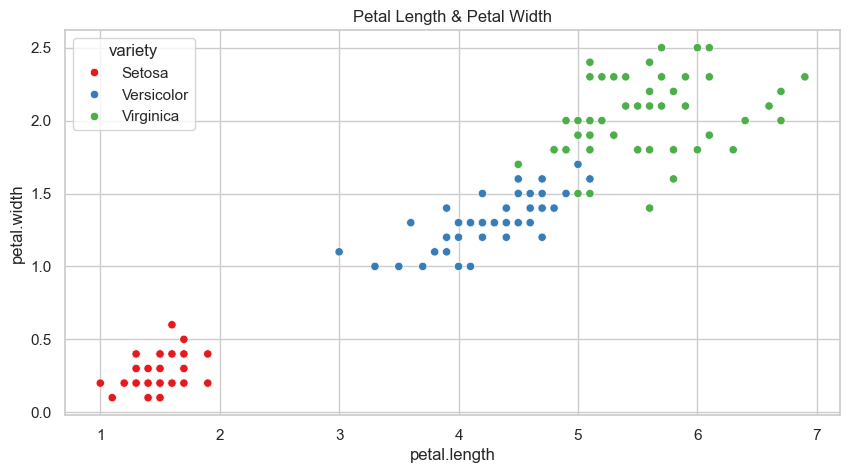

In [4]:
# Set plot style
sns.set(style="whitegrid")

# Scatter plot for Sepal Length and Sepal Width
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x="sepal.length", y="sepal.width", hue="variety", palette="Set1")
plt.title("Sepal Length & Sepal Width")
plt.show()

# Scatter plot for Petal Length and Petal Width
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x="petal.length", y="petal.width", hue="variety", palette="Set1")
plt.title("Petal Length & Petal Width")
plt.show()

In [5]:
# Encode the 'variety' column as numerical labels
data['variety'] = data['variety'].astype('category').cat.codes

# Define the feature matrix X and target vector y
X = data.drop(columns=['variety'])
y = data['variety']

# Specify the class to be removed (e.g., 0, 1, or 2)
class_to_remove = 0  # Change this value to remove a different class

# Filter out the specified class
mask = y != class_to_remove
X = X[mask]
y = y[mask]

# Reset the index after filtering
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Split the dataset into training and temporary sets (70% training, 30% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Split the temporary set into validation and test sets (15% each of the original data)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

In [6]:
# Display the shapes of the resulting datasets
print("Shapes of the datasets:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Display the unique classes in the remaining data
classes = np.unique(y)
print(f"Remaining classes after filtering: {classes}")

Shapes of the datasets:
X_train: (70, 4), y_train: (70,)
X_val: (15, 4), y_val: (15,)
X_test: (15, 4), y_test: (15,)
Remaining classes after filtering: [1 2]


Now here we need to start the algarithm part:

In [7]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [8]:
# Convert data to PyTorch tensors

X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [9]:
y

0     1
1     1
2     1
3     1
4     1
     ..
95    2
96    2
97    2
98    2
99    2
Name: variety, Length: 100, dtype: int8

In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]


In [11]:
batch_size = 20
for i, j in data_iter(batch_size, X_train, y_train):
    print(i, '\n', j)
    break

tensor([[6.4000, 2.8000, 5.6000, 2.2000],
        [5.8000, 2.8000, 5.1000, 2.4000],
        [5.5000, 2.3000, 4.0000, 1.3000],
        [6.1000, 3.0000, 4.6000, 1.4000],
        [7.7000, 3.8000, 6.7000, 2.2000],
        [5.4000, 3.0000, 4.5000, 1.5000],
        [7.7000, 2.6000, 6.9000, 2.3000],
        [6.9000, 3.1000, 5.4000, 2.1000],
        [6.3000, 2.5000, 5.0000, 1.9000],
        [6.3000, 2.7000, 4.9000, 1.8000],
        [5.8000, 2.7000, 3.9000, 1.2000],
        [5.8000, 2.7000, 4.1000, 1.0000],
        [6.4000, 2.7000, 5.3000, 1.9000],
        [7.0000, 3.2000, 4.7000, 1.4000],
        [5.8000, 2.7000, 5.1000, 1.9000],
        [5.7000, 3.0000, 4.2000, 1.2000],
        [5.2000, 2.7000, 3.9000, 1.4000],
        [6.1000, 2.8000, 4.0000, 1.3000],
        [5.9000, 3.0000, 5.1000, 1.8000],
        [5.6000, 2.5000, 3.9000, 1.1000]]) 
 tensor([[2.],
        [2.],
        [1.],
        [1.],
        [2.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [1.],
   

In [13]:
W,b

(tensor([[  9.6912],
         [-16.5709],
         [  0.1631],
         [  3.2793]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [14]:
def linreg(X, w, b): #@save
    """Linear Reression"""
    return torch.matmul(X, w) + b

In [15]:
def squared_loss(y_hat, y): #@save
    """MSL"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [16]:
def sgd(params, lr, batch_size): #@save
    """⼩批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [34]:
#training
lr = 0.03
num_epochs = 20
net = linreg
loss = squared_loss
features, labels = X_train,y_train
W = torch.normal(0, 3, size=(4,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [35]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, W, b), y) # X和y的⼩批量损失
        # 因为l形状是(batch_size,1)，⽽不是⼀个标量。l中的所有元素被加到⼀起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([W, b], lr, batch_size) # 使⽤参数的梯度更新参数
        with torch.no_grad():
            train_l = loss(net(features, W, b), labels)
            print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 95.095253
epoch 1, loss 181.090256
epoch 1, loss 368.120972
epoch 1, loss 38.055080
epoch 2, loss 78.304886
epoch 2, loss 142.789078
epoch 2, loss 215.335358
epoch 2, loss 9.833184
epoch 3, loss 11.824641
epoch 3, loss 19.255358
epoch 3, loss 58.691631
epoch 3, loss 1.746099
epoch 4, loss 2.134362
epoch 4, loss 4.758285
epoch 4, loss 4.931698
epoch 4, loss 1.192456
epoch 5, loss 1.319157
epoch 5, loss 1.410290
epoch 5, loss 1.385226
epoch 5, loss 1.130880
epoch 6, loss 1.349237
epoch 6, loss 2.031915
epoch 6, loss 2.120600
epoch 6, loss 1.107033
epoch 7, loss 1.124149
epoch 7, loss 1.094664
epoch 7, loss 1.419502
epoch 7, loss 1.263544
epoch 8, loss 1.106517
epoch 8, loss 1.353567
epoch 8, loss 2.209147
epoch 8, loss 1.089182
epoch 9, loss 1.286033
epoch 9, loss 1.639241
epoch 9, loss 1.694442
epoch 9, loss 1.110460
epoch 10, loss 1.057547
epoch 10, loss 1.580337
epoch 10, loss 2.637309
epoch 10, loss 1.233836
epoch 11, loss 1.323515
epoch 11, loss 2.310546
epoch 11, loss

In [36]:
W,b

(tensor([[-3.3754],
         [ 3.6783],
         [ 2.8349],
         [-1.7654]], requires_grad=True),
 tensor([-0.1632], requires_grad=True))

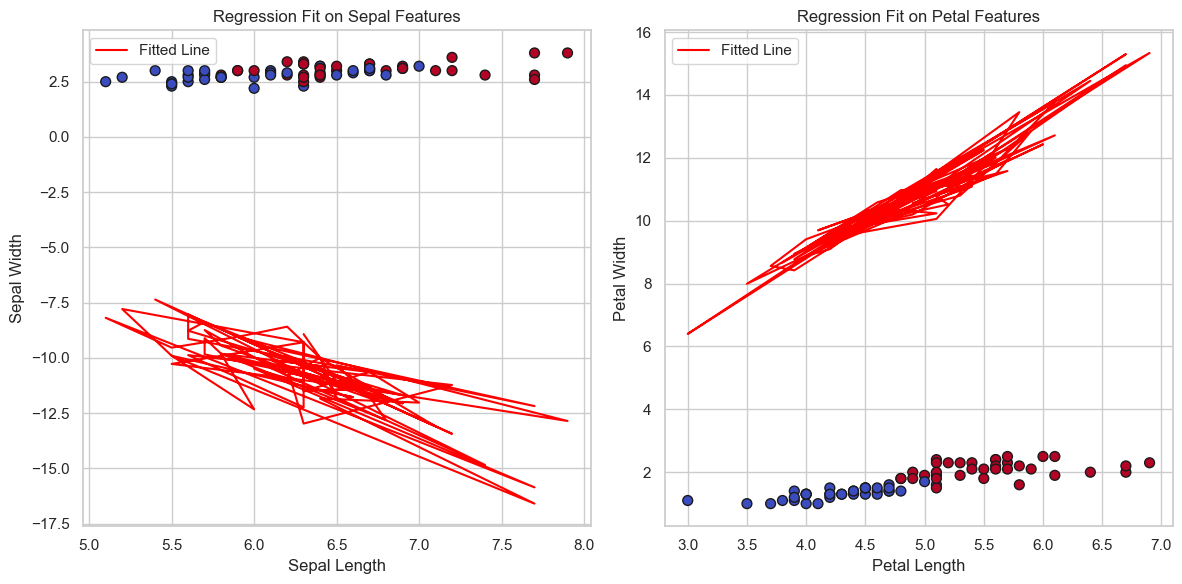

In [37]:

# Extract learned weights and bias
W_ = W.detach().numpy().flatten()
b_ = b.item()

# Convert training features back to NumPy for plotting
X_train_np = X_train.numpy()
y_train_np = y_train.numpy().flatten()

# Plot for Sepal Length & Sepal Width (using W[0] and W[1])
plt.figure(figsize=(12, 6))

# Scatter plot of Sepal features
plt.subplot(1, 2, 1)
plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=y_train_np, cmap='coolwarm', edgecolor='k', s=50)
# Calculate the fitted line using W[0], W[1], and b
x_vals = X_train_np[:, 0]
y_vals = W_[0] * X_train_np[:, 0] + W_[1] * X_train_np[:, 1] + b_
plt.plot(x_vals, y_vals, color='red', label='Fitted Line')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Regression Fit on Sepal Features')
plt.legend()

# Plot for Petal Length & Petal Width (using W[2] and W[3])
plt.subplot(1, 2, 2)
plt.scatter(X_train_np[:, 2], X_train_np[:, 3], c=y_train_np, cmap='coolwarm', edgecolor='k', s=50)
# Calculate the fitted line using W[2], W[3], and b
x_vals = X_train_np[:, 2]
y_vals = W_[2] * X_train_np[:, 2] + W_[3] * X_train_np[:, 3] + b_
plt.plot(x_vals, y_vals, color='red', label='Fitted Line')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Regression Fit on Petal Features')
plt.legend()

plt.tight_layout()
plt.show()